In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Datadirectory = "train/"
Classes = ["0", "1", "2", "3", "4", "5", "6"]

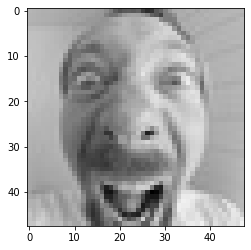

In [3]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

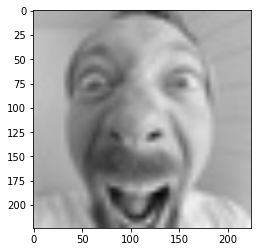

In [4]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [6]:
create_training_Data()

In [7]:
training_data_length = len(training_Data)
print(training_data_length)

28708


In [8]:
import random
random.shuffle(training_Data)

In [9]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

In [10]:
X = np.array(X).reshape(-1, img_size, img_size, 3) #convert to 4 dimension
for i in range(0,training_data_length):
    X[0] = X[0]/255.0; # normalizing

In [11]:
print(len(X))

28708


In [12]:
type(y)

list

In [13]:
Y = np.array(y)

In [14]:
Y.shape

(28708,)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.MobileNetV2()

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [18]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [19]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [20]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [21]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [23]:
new_model.fit(X,Y,epochs=15)

Epoch 1/15
 67/898 [=>............................] - ETA: 1:12:08 - loss: 1.7954 - accuracy: 0.3050

KeyboardInterrupt: 

In [21]:
new_model.save("Final_mode_95p08.h5")

In [3]:
new_model = tf.keras.models.load_model("Final_mode_95p10.h5")

In [3]:
new_model.evaluate

<bound method Model.evaluate of <tensorflow.python.keras.engine.functional.Functional object at 0x109573b80>>

In [16]:
frame = cv2.imread("angry.jpeg")

In [17]:
frame.shape

(187, 269, 3)

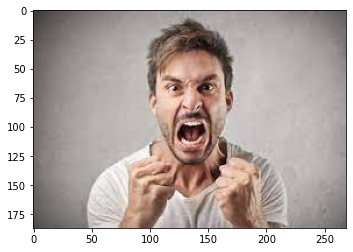

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [20]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [21]:
gray.shape

(187, 269)

In [22]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
        roi_gray =  gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else: 
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]

In [23]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [24]:
Predictions = new_model.predict(final_image)

In [25]:
Predictions[0]

array([7.8433579e-01, 3.7919492e-02, 1.7702764e-01, 1.3370175e-04,
       1.2717840e-05, 1.6414227e-04, 4.0635015e-04], dtype=float32)

In [30]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
if  (np.argmax(Predictions) == 0):
    status = "Angry"
elif (np.argmax(Predictions) == 1):
    status = "Disgust"
elif (np.argmax(Predictions) == 2):
    status = "Fear"
elif (np.argmax(Predictions) == 3):
    status = "Happy"
elif (np.argmax(Predictions) == 4):
    status = "Sad"
elif (np.argmax(Predictions) == 5):
    status = "Surprise"
elif (np.argmax(Predictions) == 6):
    status = "Neutral"
else:
    status = "not detected"
x1,y1,w1,h1 = 0,0,175,75
cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0), -1)
cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
cv2.rectangle(frame, (x, y), (x+w,y+h), (0, 0, 255))
np.max(Predictions[0])

0.7843358

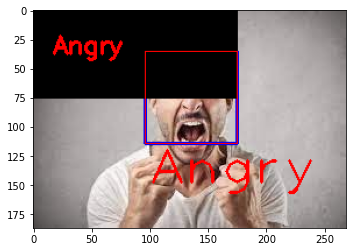

In [31]:

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
new_model = tf.keras.models.load_model("Final_mode_95p10.h5")


In [3]:
#VIDEO DETECTION
import cv2

path = "haarcascade_frontalface_default.xml" #
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
face_roi = [] 
while  True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray =  gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray, scaleFactor = 1.1, minNeighbors = 3)
        if len(facess) == 0:
            print("Face not detected")
        else: 
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
#1:16:29
    
    if  (np.argmax(Predictions) == 0):
        status = "Angry"
    elif (np.argmax(Predictions) == 1):
        status = "Disgust"
    elif (np.argmax(Predictions) == 2):
        status = "Fear"
    elif (np.argmax(Predictions) == 3):
        status = "Happy"
    elif (np.argmax(Predictions) == 4):
        status = "Sad"
    elif (np.argmax(Predictions) == 5):
        status = "Surprise"
    elif (np.argmax(Predictions) == 6):
        status = "Neutral"
    else:
        status = "not detected"
        
    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0), -1)
    cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w,y+h), (0, 0, 255))
    
    print(status)

    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Sad
Face not detected
Surprise
Sad
Sad
Surprise
Surprise
Sad
Neutral
Sad
Sad
Sad
Face not detected
Fear
Fear
Face not detected
Sad
Fear
Fear
Fear
Face not detected
Disgust
Fear
Face not detected
Sad
Sad
Fear
Sad
Face not detected
Sad
Surprise
Sad
Fear
Fear
Surprise
Sad
Sad
Surprise
Sad
Fear
Fear
Surprise
Fear
Surprise
Surprise
Surprise
Surprise
Surprise
Face not detected
Surprise
Face not detected
Surprise
Face not detected
Surprise
Fear
Fear
Fear
Face not detected
Sad
Sad
Disgust
Face not detected
Sad
Face not detected
Sad
Fear
Face not detected
Fear
Face not detected
Fear
Fear
Angry
Fear
Sad
Fear
Face not detected
Fear
Face not detected
Disgust
Angry
Angry
Face not detected
Angry
Disgust
Disgust
Disgust
Face not detected
Sad
Surprise
Sad
Sad
Fear
Face not detected
Sad
Surprise
Face not detected
Fear
Fear
Fear
Fear
Happy
Fear
Disgust
Sad
Face not detected
Sad
Sad
Sad
Face not detected
Sad
Sad
Sad
Sad
Sad
Sad
Face not detected
Fear
Sad
Sad
Sad
Sad
Sad
Sad
Face not detected
Sad
Face not

In [5]:
#VIDEO DETECTION PROVA
import face_recognition
import cv2 # pip install opencv-python
import os

 
webcam = cv2.VideoCapture(0)

#creazione lista nomi file da confrontare con video
arr = os.listdir()
fotoDB = []
for x in arr:
    if '.' in x:
        estensione = x.split('.')[1]
    else:
        estensione = ''
    if estensione == 'jpg':
        fotoDB.append(x)

print(fotoDB)

for image_file in fotoDB:
    count = 0
    label = ''
    #image_file = input("Target Image File > ")
    target_image = face_recognition.load_image_file(image_file)
    target_encoding = face_recognition.face_encodings(target_image)[0]
    target_name = image_file.split('.')[0]
    print("Image Loaded. 128-dimensions Face Encoding Generated " + target_name)

    process_this_frame = True

    while count < 10:
        ret, frame = webcam.read()
        small_frame = cv2.resize(frame, None, fx=0.20, fy=0.20)
        rgb_small_frame = cv2.cvtColor(small_frame, 4)

        if process_this_frame:
            face_location = face_recognition.face_locations(rgb_small_frame)
            frame_encodings = face_recognition.face_encodings(rgb_small_frame)

            if frame_encodings:
                frame_face_encoding = frame_encodings[0]
                match = face_recognition.compare_faces([target_encoding],frame_face_encoding)[0]
                label = target_name if match else "Unknown"
        
        process_this_frame = not process_this_frame

        if face_location:
            top, right, bottom, left = face_location[0]

            top *= 5
            right *= 5
            bottom *= 5
            left *= 5 

            cv2.rectangle(frame, (left, top), (right, bottom), (0,255,0), 2)

            cv2.rectangle(frame, (left, bottom - 30), (right, bottom), (0,255,0), cv2.FILLED)
            label_font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, label, (left + 6, bottom - 6), label_font, 0.8, (255,255,255), 1)
        
        cv2.imshow("Video Feed", frame)
        if (label == "Unknown"):
            count += 1
        else:
            count = 0

        print('label: ' + label + '\n' + 'count: ' + str(count))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
webcam.release()
cv2.destroyAllWindows()

['happyboy.jpg', 'chiara.jpg']
Image Loaded. 128-dimensions Face Encoding Generated happyboy
label: Unknown
count: 1
label: Unknown
count: 2
label: Unknown
count: 3
label: Unknown
count: 4
label: Unknown
count: 5
label: Unknown
count: 6
label: Unknown
count: 7
label: Unknown
count: 8
label: Unknown
count: 9
label: Unknown
count: 10
Image Loaded. 128-dimensions Face Encoding Generated chiara
label: 
count: 0
label: 
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count: 0
label: chiara
count:

KeyboardInterrupt: 